In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [82]:
fraud=pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [83]:
fraud=fraud.rename(columns={"Marital.Status":"Marital","Taxable.Income":"Tax_income","City.Population":"City_population","Work.Experience":"Work_exp"})
fraud

,Undergrad,Marital,Tax_income,City_population,Work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [84]:
fraud["Income_Status"]=np.where(fraud["Tax_income"]>=30000,"Good","Risky")# 1 is Good and 0 is Risky
fraud.head(10)

,Undergrad,Marital,Tax_income,City_population,Work_exp,Urban,Income_Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [85]:
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital']=label_encoder.fit_transform(fraud['Marital'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud['Income_Status']=label_encoder.fit_transform(fraud['Income_Status'])

In [86]:
fraud.drop(["Tax_income"],axis=1,inplace=True)

In [87]:
fraud

,Undergrad,Marital,City_population,Work_exp,Urban,Income_Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [88]:
x=fraud.iloc[:,:5]
y=fraud["Income_Status"]

In [89]:
x

,Undergrad,Marital,City_population,Work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [90]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income_Status, Length: 600, dtype: int32

In [91]:
fraud.Income_Status.value_counts()

0    476
1    124
Name: Income_Status, dtype: int64

In [92]:
colnames=list(fraud.columns)
colnames

['Undergrad',
 'Marital',
 'City_population',
 'Work_exp',
 'Urban',
 'Income_Status']

In [97]:
#Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [98]:
y_train

332    0
13     0
274    0
257    0
112    0
      ..
440    0
165    0
7      0
219    1
326    1
Name: Income_Status, Length: 480, dtype: int32

# Building Decision Tree Classifier using gini Criteria

[Text(0.5416666666666666, 0.875, 'x[2] <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.375, 'x[4] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(0.75, 0.625, 'x[2] <= 64532.5\ngini = 0.345\nsamples = 374\nvalue = [291, 83]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 130296.0\ngini = 0.341\nsamples = 372\nvalue = [291, 81]'),
 Text(0.75, 0.125, 'gini = 0.376\nsamples = 203\nva

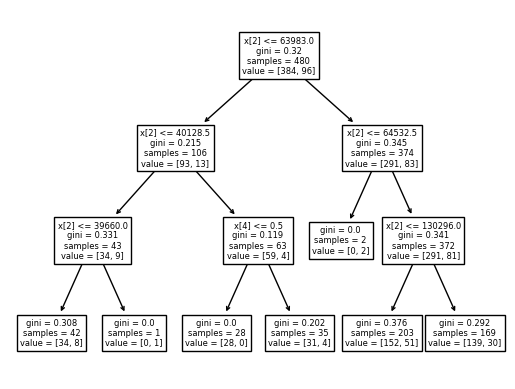

In [99]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)
model_gini.fit(x_train,y_train)

#Plot the Decision tree
tree.plot_tree(model_gini)

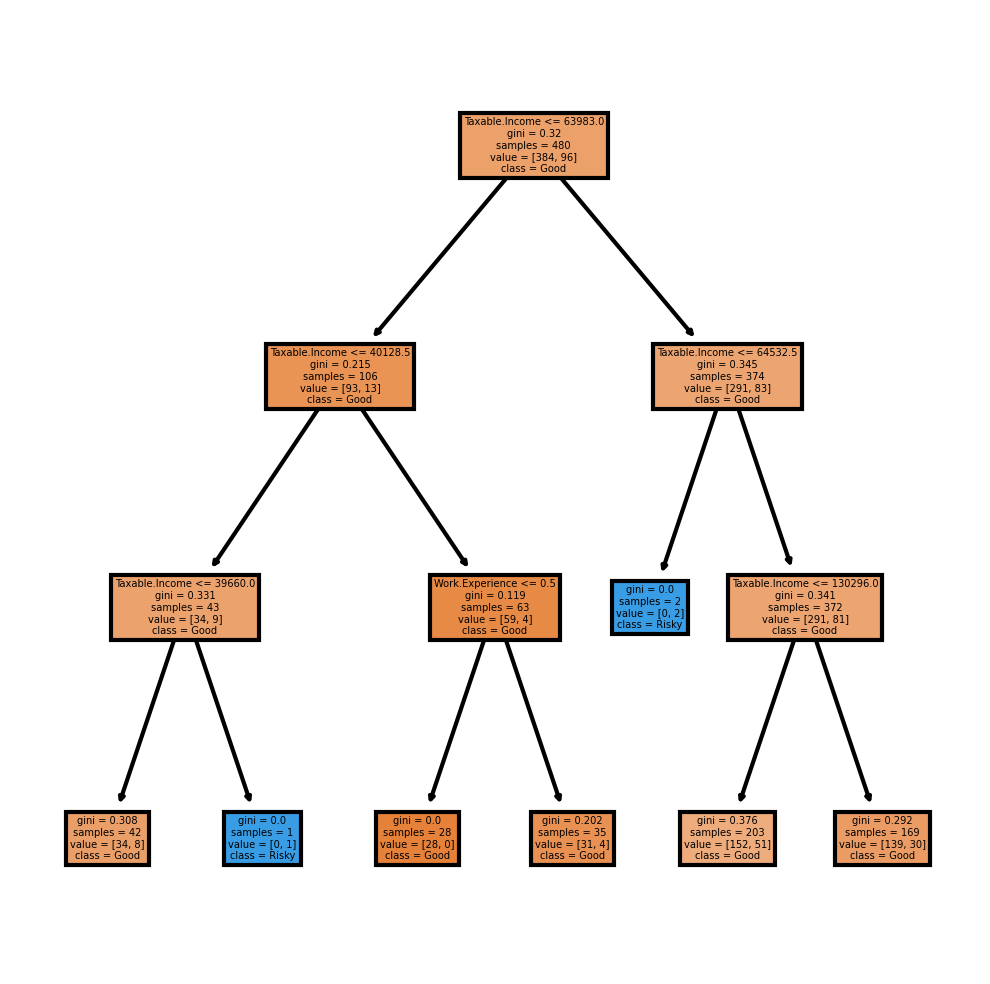

In [100]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"]
cn=["Good","Risky"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model_gini,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [105]:
#Predecting on test data
pred=model_gini.predict(x_test)#Predicting on test data
pd.Series(pred).value_counts()

0    119
1      1
dtype: int64

In [106]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
metrics.accuracy_score(pred,y_test)

0.7583333333333333

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120

